<a href="https://colab.research.google.com/github/mshilpaa/ethereum-data-analysis/blob/master/OrderBy/DBSCan-Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np

In [0]:
feats = ['no_of_in_transactions', 'tot_ether_recieved', 'eth_balance',
       'no_of_out_transactions', 'tot_ether_sent', 'tot_token_value_recieved',
       'tot_token_value_sent', 'time_b/w_in_txn', 'time_b/w_out_txn',
       'active_months', 'monthly_out_txn', 'monthly_in_txn',
       'monthly_ether_sent', 'monthly_ether_recieved' ]

In [0]:
d = {feats[i]:chr(65+i) for i in range(len(feats))}

In [9]:
d

{'active_months': 'J',
 'eth_balance': 'C',
 'monthly_ether_recieved': 'N',
 'monthly_ether_sent': 'M',
 'monthly_in_txn': 'L',
 'monthly_out_txn': 'K',
 'no_of_in_transactions': 'A',
 'no_of_out_transactions': 'D',
 'time_b/w_in_txn': 'H',
 'time_b/w_out_txn': 'I',
 'tot_ether_recieved': 'B',
 'tot_ether_sent': 'E',
 'tot_token_value_recieved': 'F',
 'tot_token_value_sent': 'G'}

In [0]:
#setting up color ma
import matplotlib.pyplot as plt
NUM_COLORS = 10
cmp = plt.get_cmap('viridis', 3)

In [0]:
data_with_clusters =  pd.read_csv(r'/content/gdrive/My Drive/data/dbscan_final_data.csv')


In [12]:
data_with_clusters.head()

,Unnamed: 0,address,no_of_out_transactions,tot_ether_sent,no_of_in_transactions,tot_ether_recieved,eth_balance,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,lables
0,0,0x61b343eff40366274bf360f414d422a0dafb30e1,1,5.114566e-17,256,7.005406e-17,1.890756e-17,1.576596e-15,1.000000e-16,222806.843750,0.00,23,1.000000,11.130435,2.223724e-18,3.045829e-18,0
1,1,0xee42c0affa3aef8bf92254b254faabd540899e6f,1,2.000000e-18,256,8.565632e-18,6.565569e-18,1.964063e-14,1.000000e-16,102862.480469,0.00,11,1.000000,23.272727,1.818182e-19,7.786938e-19,0
2,2,0xc1d0bb46ac0e6d34dc94de4f3c64b1d1fd846bc8,4,1.440000e-17,256,3.273250e-17,1.832946e-17,1.932021e-15,1.000000e-16,153549.269531,1232720.25,16,1.333333,16.000000,9.000000e-19,2.045781e-18,0
3,3,0x11bc4233e44e270f51ddd372471e251552f8b593,4,3.310000e-18,256,1.345141e-17,1.013973e-17,1.113982e-17,1.000000e-16,82704.714844,2730443.75,9,1.333333,28.444444,3.677778e-19,1.494601e-18,0
4,4,0xae083ff8f14b5b831b331c59d4f192bbbe170e21,5,4.154793e-17,256,7.049407e-17,2.894354e-17,4.675494e-14,1.000000e-16,202065.785156,3387412.80,20,1.000000,12.800000,2.077396e-18,3.524703e-18,0


In [0]:
data_with_clusters.drop(columns = ['address','Unnamed: 0'])
labels_ = list(data_with_clusters['lables'])

In [0]:
total_eth = {}
total_addresses = {}

for clust in np.unique(labels_):
    mask = labels_==clust
    eth = np.sum(data_with_clusters[mask]['eth_balance'])
    size = np.sum(labels_==clust)
    total_eth[clust] = eth
    total_addresses[clust] = size

In [0]:

names = np.array(list(total_eth.keys()))
values = np.array(list(total_eth.values()))
indices = np.argsort(values)

names = names[indices][::-1]
values = values[indices][::-1]

In [16]:
names

array([-1,  0,  7,  2,  6,  8,  3,  4,  5,  1])

In [0]:
cl = []
for i in range(-1,9):

  process = data_with_clusters[data_with_clusters['lables']== i].drop(columns = ['Unnamed: 0','address'])
  cl.append(process.mean(axis = 0))

In [0]:
avg_data = pd.DataFrame(cl[0])
avg_data = avg_data.transpose() 

In [0]:
for i in range(1,10):
  a = pd.DataFrame(cl[i])
  b = a.transpose()
  avg_data = avg_data.append(b,ignore_index = True)

In [126]:
avg_data

,no_of_out_transactions,tot_ether_sent,no_of_in_transactions,tot_ether_recieved,eth_balance,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,lables
0,5407.630597,1.922466e-14,2234.506530,1.580028e-14,3.122888e-15,6.084581e+41,1.053450e+41,8.638790e+06,5.057241e+06,9.027985,723.850837,58.599414,1.593479e-15,1.809076e-15,-1.0
1,26.549407,8.849908e-17,6.887357,1.058839e-16,5.061959e-17,1.954515e+39,3.597707e+37,4.430093e+06,2.814957e+06,5.199898,6.050735,1.920210,1.698804e-17,2.427769e-17,0.0
2,2.000000,6.556680e-17,1.800000,7.724862e-17,1.167994e-17,9.313813e-13,9.102243e-13,7.168767e+03,4.217511e+07,2.000000,1.000000,1.800000,3.278340e-17,3.862431e-17,1.0
3,2.375000,4.575822e-18,2.250000,3.243711e-17,2.785921e-17,2.271753e-14,1.265215e-14,2.804759e+07,2.726424e+07,2.500000,1.187500,1.125000,2.280112e-18,1.348474e-17,2.0
4,2.000000,9.956867e-18,2.833333,3.069304e-17,2.140631e-17,4.948617e-13,2.938783e-13,2.504652e+07,3.722472e+07,2.833333,1.000000,1.416667,3.393461e-18,1.230402e-17,3.0
5,3.666667,6.909880e-18,2.000000,2.175123e-17,1.483538e-17,6.250751e-12,1.856579e-14,3.678015e+07,1.433069e+07,3.166667,1.472222,1.000000,2.303293e-18,7.104608e-18,4.0
6,3.500000,1.355485e-18,2.166667,1.096770e-17,1.054364e-17,7.189304e-15,1.558970e-15,3.689612e+07,1.882926e+07,3.500000,1.305556,1.000000,4.096772e-19,3.244914e-18,5.0
7,3.714286,2.978526e-17,2.142857,5.479970e-17,2.954070e-17,3.444491e-14,5.366993e-15,3.221044e+07,1.664759e+07,3.285714,1.571429,1.000000,7.290407e-18,1.761329e-17,6.0
8,4.000000,1.000000e-22,4.000000,2.350000e-15,2.349996e-15,1.177511e-10,4.950477e-14,3.343375e+03,3.019492e+06,2.000000,2.000000,4.000000,5.000000e-23,1.175000e-15,7.0
9,2.000000,5.803086e-19,5.500000,3.429178e-17,3.446193e-17,5.465554e-14,5.269883e-16,8.931216e+06,3.328777e+07,3.000000,1.000000,2.750000,2.061959e-19,1.439805e-17,8.0


In [0]:
df_radar = avg_data
df_radar['label'] = df_radar['lables']
df_radar.loc[0, 'label'] = 9
df_radar = df_radar.reset_index()
df_radar.set_index('label', inplace=True)


In [0]:
df_radar[df_radar<0] = 0

In [0]:
#log scale
#df_radar = np.log1p(df_radar)+1

In [139]:
df_radar

,index,no_of_out_transactions,tot_ether_sent,no_of_in_transactions,tot_ether_recieved,eth_balance,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,lables
label,,,,,,,,,,,,,,,,
9.0,0,5407.630597,1.922466e-14,2234.506530,1.580028e-14,3.122888e-15,6.084581e+41,1.053450e+41,8.638790e+06,5.057241e+06,9.027985,723.850837,58.599414,1.593479e-15,1.809076e-15,0.0
0.0,1,26.549407,8.849908e-17,6.887357,1.058839e-16,5.061959e-17,1.954515e+39,3.597707e+37,4.430093e+06,2.814957e+06,5.199898,6.050735,1.920210,1.698804e-17,2.427769e-17,0.0
1.0,2,2.000000,6.556680e-17,1.800000,7.724862e-17,1.167994e-17,9.313813e-13,9.102243e-13,7.168767e+03,4.217511e+07,2.000000,1.000000,1.800000,3.278340e-17,3.862431e-17,1.0
2.0,3,2.375000,4.575822e-18,2.250000,3.243711e-17,2.785921e-17,2.271753e-14,1.265215e-14,2.804759e+07,2.726424e+07,2.500000,1.187500,1.125000,2.280112e-18,1.348474e-17,2.0
3.0,4,2.000000,9.956867e-18,2.833333,3.069304e-17,2.140631e-17,4.948617e-13,2.938783e-13,2.504652e+07,3.722472e+07,2.833333,1.000000,1.416667,3.393461e-18,1.230402e-17,3.0
4.0,5,3.666667,6.909880e-18,2.000000,2.175123e-17,1.483538e-17,6.250751e-12,1.856579e-14,3.678015e+07,1.433069e+07,3.166667,1.472222,1.000000,2.303293e-18,7.104608e-18,4.0
5.0,6,3.500000,1.355485e-18,2.166667,1.096770e-17,1.054364e-17,7.189304e-15,1.558970e-15,3.689612e+07,1.882926e+07,3.500000,1.305556,1.000000,4.096772e-19,3.244914e-18,5.0
6.0,7,3.714286,2.978526e-17,2.142857,5.479970e-17,2.954070e-17,3.444491e-14,5.366993e-15,3.221044e+07,1.664759e+07,3.285714,1.571429,1.000000,7.290407e-18,1.761329e-17,6.0
7.0,8,4.000000,1.000000e-22,4.000000,2.350000e-15,2.349996e-15,1.177511e-10,4.950477e-14,3.343375e+03,3.019492e+06,2.000000,2.000000,4.000000,5.000000e-23,1.175000e-15,7.0


In [140]:
# scale by max present per column

for col in df_radar.columns:
    df_radar[col] = [val/max(df_radar[col]) for val in df_radar[col]]
ls = list(df_radar)[1:-1]
df_radar.columns

Index(['index', 'no_of_out_transactions', 'tot_ether_sent',
       'no_of_in_transactions', 'tot_ether_recieved', 'eth_balance',
       'tot_token_value_recieved', 'tot_token_value_sent', 'time_b/w_in_txn',
       'time_b/w_out_txn', 'active_months', 'monthly_out_txn',
       'monthly_in_txn', 'monthly_ether_sent', 'monthly_ether_recieved',
       'lables'],
      dtype='object')

In [0]:

feats = ['no_of_in_transactions', 'tot_ether_recieved', 'eth_balance',
       'no_of_out_transactions', 'tot_ether_sent', 'tot_token_value_recieved',
       'tot_token_value_sent', 'time_b/w_in_txn', 'time_b/w_out_txn',
       'active_months', 'monthly_out_txn', 'monthly_in_txn',
       'monthly_ether_sent', 'monthly_ether_recieved' ]

In [142]:
d = {feats[i]:chr(65+i) for i in range(len(feats))}
d

{'active_months': 'J',
 'eth_balance': 'C',
 'monthly_ether_recieved': 'N',
 'monthly_ether_sent': 'M',
 'monthly_in_txn': 'L',
 'monthly_out_txn': 'K',
 'no_of_in_transactions': 'A',
 'no_of_out_transactions': 'D',
 'time_b/w_in_txn': 'H',
 'time_b/w_out_txn': 'I',
 'tot_ether_recieved': 'B',
 'tot_ether_sent': 'E',
 'tot_token_value_recieved': 'F',
 'tot_token_value_sent': 'G'}

In [0]:
dfr = df_radar[feats]

In [144]:
dfr

,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved
label,,,,,,,,,,,,,,
9.0,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.234138,0.119911,1.000000,1.000000,1.000000,1.000000e+00,1.000000
0.0,0.003082,0.006701,0.016209,0.004910,4.603414e-03,3.212243e-03,3.415166e-04,0.120069,0.066745,0.575975,0.008359,0.032768,1.066097e-02,0.013420
1.0,0.000806,0.004889,0.003740,0.000370,3.410557e-03,1.530724e-54,8.640411e-54,0.000194,1.000000,0.221533,0.001382,0.030717,2.057347e-02,0.021350
2.0,0.001007,0.002053,0.008921,0.000439,2.380183e-04,3.733623e-56,1.201021e-55,0.760177,0.646453,0.276917,0.001641,0.019198,1.430902e-03,0.007454
3.0,0.001268,0.001943,0.006855,0.000370,5.179215e-04,8.133045e-55,2.789674e-54,0.678839,0.882623,0.313839,0.001382,0.024175,2.129592e-03,0.006801
4.0,0.000895,0.001377,0.004751,0.000678,3.594279e-04,1.027310e-53,1.762379e-55,0.996857,0.339790,0.350761,0.002034,0.017065,1.445449e-03,0.003927
5.0,0.000970,0.000694,0.003376,0.000647,7.050762e-05,1.181561e-56,1.479870e-56,1.000000,0.446454,0.387683,0.001804,0.017065,2.570960e-04,0.001794
6.0,0.000959,0.003468,0.009459,0.000687,1.549326e-03,5.661016e-56,5.094681e-56,0.873003,0.394725,0.363948,0.002171,0.017065,4.575150e-03,0.009736
7.0,0.001790,0.148732,0.752507,0.000740,5.201652e-09,1.935238e-52,4.699298e-55,0.000091,0.071594,0.221533,0.002763,0.068260,3.137788e-08,0.649503


In [0]:
#setting up color ma
import matplotlib.pyplot as plt
NUM_COLORS = 10
cmp = plt.get_cmap('viridis', 3)

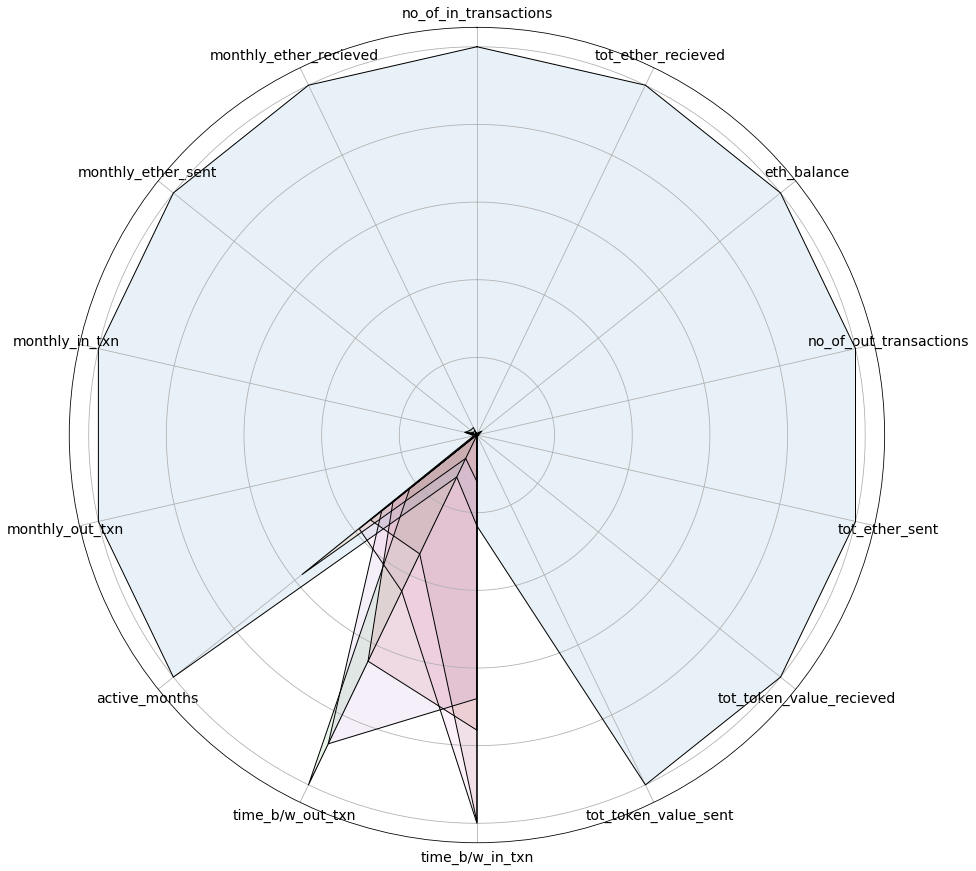

In [146]:
import matplotlib.pyplot as plt

from math import pi

 
fig = plt.figure(figsize=(15,15))
# ------- PART 1: Create background
 
# number of variable
categories=list(dfr)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
#ax.set_color_cycle([cmp(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
plt.xticks(fontsize=14)
# Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
ax.set_yticklabels([])
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for i in range(7):
    # Ind1
    lbl = df_radar.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color='k', label=lbl)
    ax.fill(angles, values, alpha=0.1)


In [0]:
names = [0,1,2,3,4,5,6,7,8,9]
dfr=dfr.loc[[0,1,2,3,4,5,6,7,8,9]]

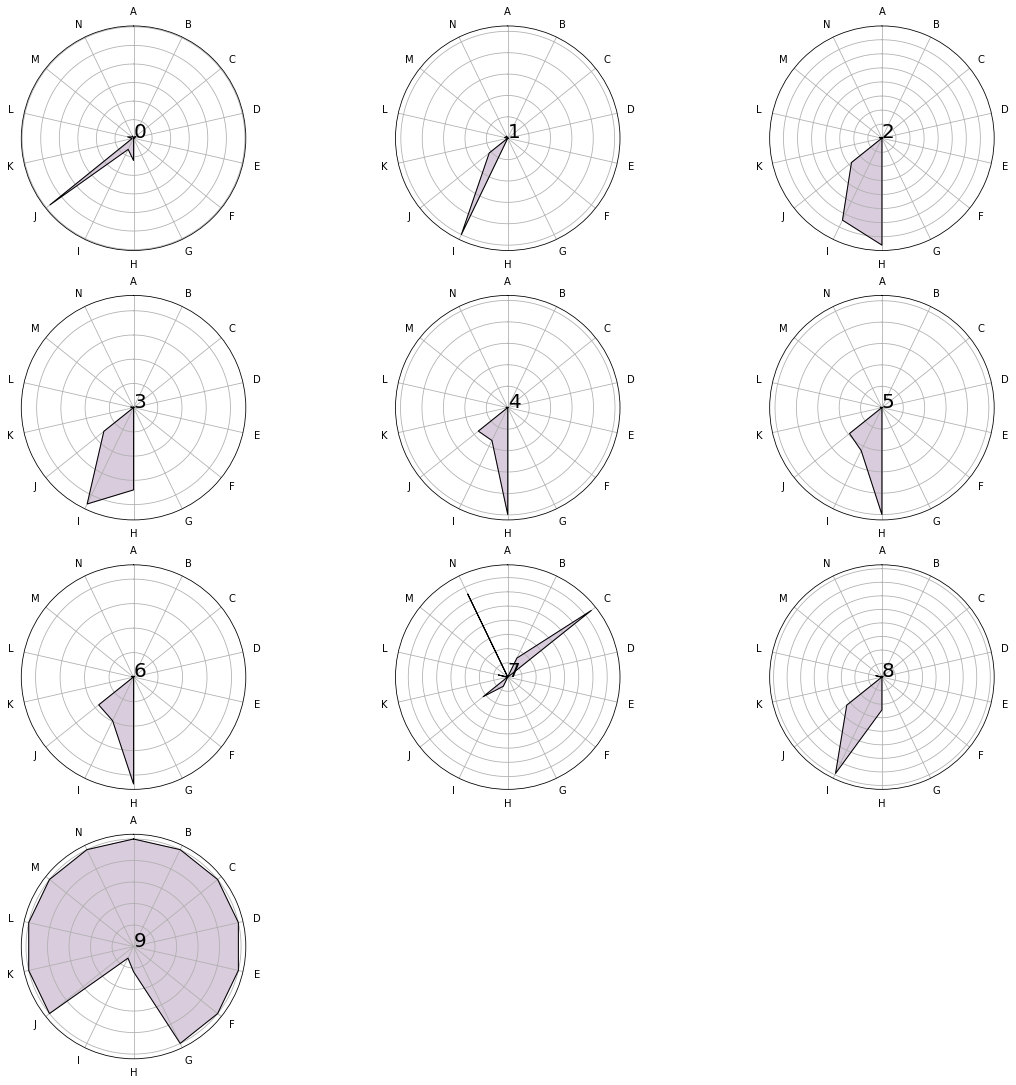

In [148]:
import matplotlib as mpl

from pylab import *

fig = plt.figure(figsize=(19,19))
# ------- PART 1: Create background

# number of variable
categories=list(dfr)
categories=list(d.values())
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for i,c in enumerate(names):
    rgb = cmp(0)[:3] # will return rgba, we take only first 3 so we get rgb
    # Initialise the spider plot
    ax = plt.subplot(4,3,i+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    plt.xticks(fontsize=10)
    # Draw ylabels
    # ax.set_rlabel_position(0)
    # plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    # plt.ylim(0,40)
    ax.set_yticklabels([])
     #hide labels
#     ax.set_xticklabels([])
 
# # Plot each individual = each line of the data
 

    lbl = dfr.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,c='k', linestyle='solid')
    ax.fill(angles, values, alpha=0.2,c=rgb, label=lbl)
    fnt=20
    
    ax.text(1,0, str(lbl), fontsize=fnt)


In [0]:
dfdf = pd.DataFrame(pd.Series(d))

In [150]:
dfdf.sort_values(by=0)

,0
no_of_in_transactions,A
tot_ether_recieved,B
eth_balance,C
no_of_out_transactions,D
tot_ether_sent,E
tot_token_value_recieved,F
tot_token_value_sent,G
time_b/w_in_txn,H
time_b/w_out_txn,I
active_months,J


In [151]:
names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]